In [174]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display

%matplotlib inline               

pykat.init_pykat_plotting(dpi=200)

In [175]:
basecode = """

#input laser
l L0 1 0 n0

#HG modes

const l 9

tem L0 0 0 1 0 
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0 
tem L0 8 0 1 0 
tem L0 9 0 1 0
tem L0 10 0 1 0 

#cavity
s s0 1 n0 nITM1
m1 ITM 0.1 0 0 nITM1 nITM2
s scav $l nITM2 nETM1
m1 ETM 0.1 0 0 nETM1 nETM2

#mirror Roc
attr ITM Rc 0
attr ETM Rcx 10
attr ETM Rcy 10

cav FP ITM nITM2 ETM nETM1



#plot g vs order
xaxis ETM Rcx lin 10 70 12000
func g = 1-($l/$x1)
put ETM Rcy $x1

#ad detectors
ad order0 0 0 0 nETM2
ad order1 1 0 0 nETM2
ad order2 2 0 0 nETM2
ad order3 3 0 0 nETM2
ad order4 4 0 0 nETM2
ad order5 5 0 0 nETM2
ad order6 6 0 0 nETM2
ad order7 7 0 0 nETM2
ad order8 8 0 0 nETM2
ad order9 9 0 0 nETM2
ad order10 10 0 0 nETM2




maxtem 10
phase 2

#noplot Rc2

"""

In [176]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(basecode)

out = basekat.run()
out.info()
#out.plot()

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 8 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 9 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 10 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
R

100% | ETA:  0:00:00 | Saving data                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 185.654 seconds

--- Output info ---

Run date and time: 2021-06-21 02:45:29.498816
Detectors used: g, order0, order1, order10, order2, order3, order4, order5, order6, order7, order8, order9

One xaxis used: ['xaxis ETM Rcx lin 10 70 12000', 'put ETM Rcy $x1']
order0  : min = 3.015113445777630e-01 max = 3.015113445777630e-01
order1  : min = 1.672484020014180e-02 max = 4.384687845609210e-02
order2  : min = 1.586901813567180e-02 max = 2.638347940513850e-02
order3  : min = 1.586901813567180e-02 max = 3.015113445777630e-01
order4  : min = 1.586901813669630e-02 max = 3.015113445777630e-01
order5  : min = 1.586901843438570e-02 max = 3.015113382156700e-01
order6  : min = 1.586901813567180e-02 max = 3.015113445777630e-01
order7  : min = 1.586901848742190e-02 max = 3.015109329781050e-01
order8  : min = 1.586901829346900e-02 max = 3.015113445777630e-01
order9  : min = 1.586901813567180e-02 max = 3.015113445777630e-

Text(0, 0.5, 'HG modes intensity')

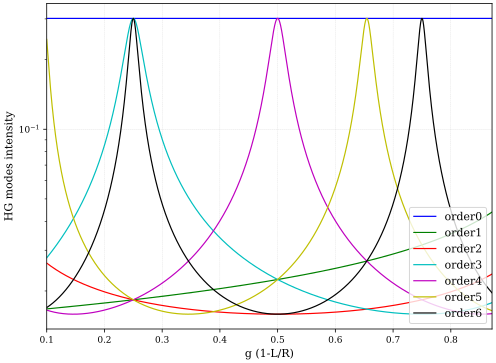

In [177]:

y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','w']
plt.figure(figsize=(8,6))
for i in range(7):
    y.append(out['order'+str(i)])
    plt.semilogy(x,y[i],antialiased=False,label='order'+str(i),c=colors[i])

plt.legend(["order0", "order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"], loc ="lower right")
plt.xlabel("g (1-L/R)")
plt.ylabel("HG modes intensity")